In [1]:
import tensorflow as tf
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [2]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 10  # CIFAR-10 has 10 classes
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [3]:
# from tensorflow.keras import layers, models

# # Define the model architecture
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model architecture
model = models.Sequential()

# Convolutional and pooling layers with batch normalization and padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(layers.Flatten())

# Dense layers for classification with dropout
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the model using the data generator
# Assuming `x_train` and `y_train` are your training data and labels
datagen.fit(train_images)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                        

In [4]:

history=model.fit(datagen.flow(train_images,train_labels, batch_size=64),
          steps_per_epoch=len(train_images) / 64, epochs=50,
          validation_data=(train_images, train_labels))

Epoch 1/50
781/781 [==============================] - 46s 47ms/step - loss: 1.8005 - accuracy: 0.3510 - val_loss: 1.6426 - val_accuracy: 0.4030
Epoch 2/50
781/781 [==============================] - 34s 44ms/step - loss: 1.3790 - accuracy: 0.5138 - val_loss: 1.0654 - val_accuracy: 0.6263
Epoch 3/50
781/781 [==============================] - 35s 44ms/step - loss: 1.2079 - accuracy: 0.5850 - val_loss: 1.2225 - val_accuracy: 0.5793
Epoch 4/50
781/781 [==============================] - 33s 42ms/step - loss: 1.0850 - accuracy: 0.6301 - val_loss: 1.0227 - val_accuracy: 0.6462
Epoch 5/50
781/781 [==============================] - 35s 45ms/step - loss: 0.9978 - accuracy: 0.6637 - val_loss: 1.1700 - val_accuracy: 0.5896
Epoch 6/50
781/781 [==============================] - 34s 44ms/step - loss: 0.9413 - accuracy: 0.6862 - val_loss: 1.0558 - val_accuracy: 0.6409
Epoch 7/50
781/781 [==============================] - 33s 43ms/step - loss: 0.8939 - accuracy: 0.7014 - val_loss: 0.9522 - val_accuracy:

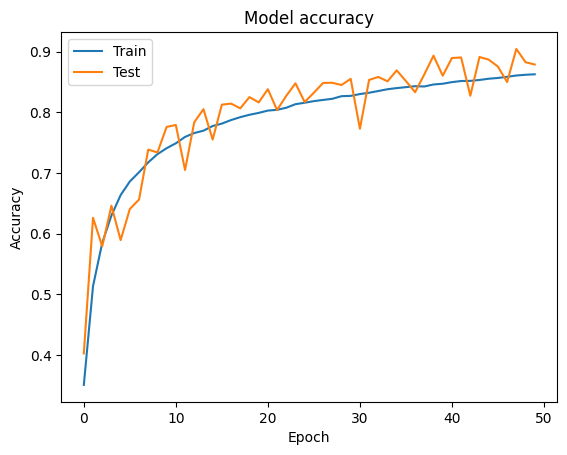

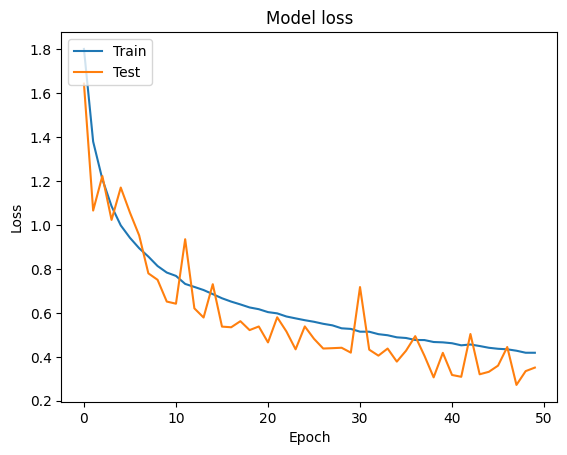

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [6]:
model.save('cifar10_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
